# Results
In this notebook we will learn the following about the Results class returned a Benchmark evaluation:
1. **Result Creation**: How to create Results from a Benchmark and Learners.
2. **Result Plotting**: How to create plots of the learners that were evaluted by a benchmark
3. **Result Saving/Loading**: How to save and load results to and from disk
4. **Result Filtering**: How to look at specific pieces of our results 
5. **Result to Pandas**: How to turn Result into a collection of Pandas dataframes for more in-depth analysis

## Result Creation

**Results** are created whenever Learners are evaluated on a Benchmark. Below is a simple example of this:

In [1]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

result = Benchmark([ValidationSimulation()]).evaluate([RandomLearner(), VowpalLearner()])

2021-07-29 23:15:12 Processing chunk...
2021-07-29 23:15:12   * Creating source 0 from Validation... (0.0 seconds) (completed)
2021-07-29 23:15:12   * Creating simulation 0 from source 0... (0.0 seconds) (completed)
2021-07-29 23:15:12   * Calculating Simulation 0 statistics... (0.0 seconds) (completed)
2021-07-29 23:15:12   * Evaluating learner 0 on Simulation 0... (0.01 seconds) (completed)
2021-07-29 23:15:13   * Evaluating learner 1 on Simulation 0... (0.17 seconds) (completed)


## Result Plotting

The **Result** class is capable of creating two separate plots: 1) `plot_learners` and `plot_shuffles`. 

### Plot Learners
Perhaps the most straightforward question after running a Benchmark is asking which Learners performed best.

To answer this question the **Result** has a `plot_learners` method.

2021-07-29 23:18:32 Processing chunk...
2021-07-29 23:18:32   * Creating source 0 from Validation... (0.0 seconds) (completed)
2021-07-29 23:18:32   * Creating simulation 0 from source 0... (0.0 seconds) (completed)
2021-07-29 23:18:32   * Calculating Simulation 0 statistics... (0.0 seconds) (completed)
2021-07-29 23:18:32   * Evaluating learner 0 on Simulation 0... (0.01 seconds) (completed)
2021-07-29 23:18:33   * Evaluating learner 1 on Simulation 0... (0.17 seconds) (completed)
2021-07-29 23:18:33   * Creating simulation 1 from source 0... (0.0 seconds) (completed)
2021-07-29 23:18:33   * Calculating Simulation 1 statistics... (0.0 seconds) (completed)
2021-07-29 23:18:33   * Evaluating learner 0 on Simulation 1... (0.01 seconds) (completed)
2021-07-29 23:18:33   * Evaluating learner 1 on Simulation 1... (0.17 seconds) (completed)
2021-07-29 23:18:33   * Creating simulation 2 from source 0... (0.0 seconds) (completed)
2021-07-29 23:18:33   * Calculating Simulation 2 statistics... (

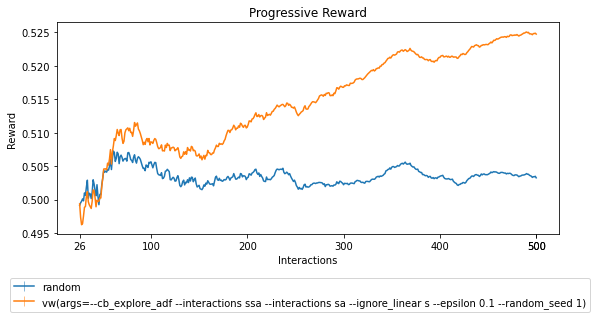

In [4]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

result = Benchmark([ValidationSimulation()], shuffle=[1,2,3,4]).evaluate([RandomLearner(), VowpalLearner()])

result.plot_learners()

The `plot_learners` method has many arguments which allow customization of the plot.
```python
"""
Args:
    xlim: Define the x-axis limits to plot. If `None` the x-axis limits will be inferred.
    ylim: Define the y-axis limits to plot. If `None` the y-axis limits will be inferred.
    span: In general this indicates how many previous evaluations to average together. In practice this works
        identically to ewm span value in the Pandas API. Additionally, if span equals None then all previous 
        rewards are averaged together vs span = 1 WHERE the instantaneous reward is plotted for each interaction.
    err: Determine what kind of error bars to plot (if any). Valid types are `None`, 'se', and 'sd'. If `None`
        then no bars are plotted, if 'se' the standard error is shown, and if 'sd the standard deviation is shown.
    obs: Determine whether each constituent observation used to estimate mean performance is also plotted.
"""
```

For example, we can examine learner performance at the end of the Benchmark and compare smoothed reward to their instantaneous reward.

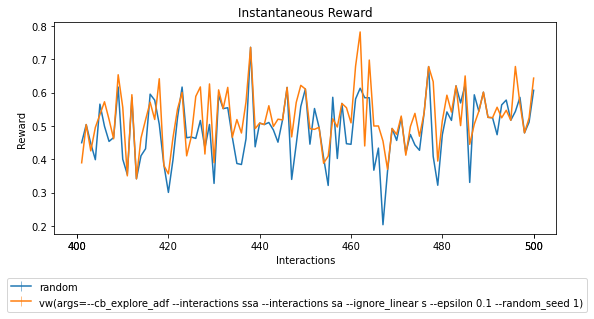

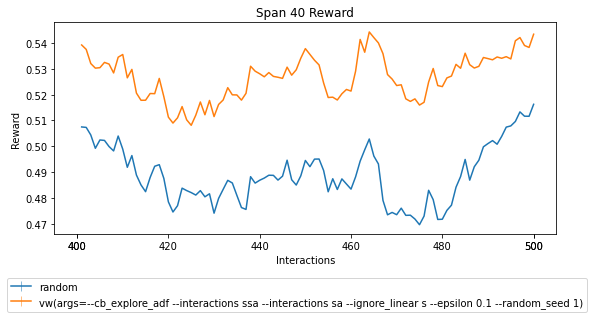

In [2]:
result.plot_learners(xlim=(400,500), span=1           )
result.plot_learners(xlim=(400,500), span=40, err='se')

### Plot Shuffles
In addition to plotting average Learner performance we can also zoom in on a single learner and superimpose its average performance on top of each of the individual shuffles that we included in our Benchmark. In our current results we have 4 shuffle seeds so there are four different performance results which are averaged together.

The `plot_shuffles` command has all the same arguments are `plot_learners`. Additionally, `plot_shuffles` assumes there's only one source of shuffles and one learner. For this reason you should pass in a source pattern and a learner pattern if there are multiple learners or simulation sources contained in the result.

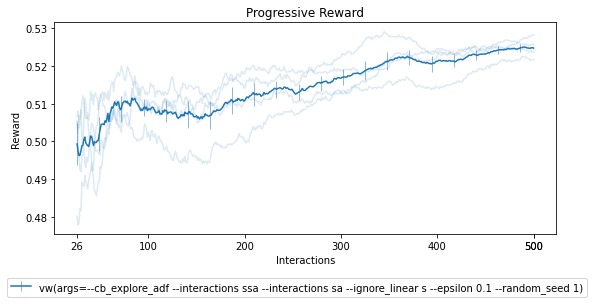

In [6]:
result.filter_lrn(full_name="vw").plot_learners(err='se',obs=True)

## Result Saving/Loading
Saving and restoring a **Result** is the easiest way to archive and share results with others. 

Saving is done via Benchmark `evaluation`. The following code block will save the Result of the benchmark evaluation in result.log

In [7]:
from coba.simulations import ValidationSimulation
from coba.learners    import RandomLearner, VowpalLearner
from coba.benchmarks  import Benchmark

simulations = [ValidationSimulation()          ]
learners    = [RandomLearner(), VowpalLearner()]

result = Benchmark(simulations, shuffle=[1,2,3]).evaluate(learners, "result.log")

2021-07-29 23:19:04 Processing chunk...
2021-07-29 23:19:04   * Creating source 0 from Validation... (0.0 seconds) (completed)
2021-07-29 23:19:04   * Creating simulation 0 from source 0... (0.0 seconds) (completed)
2021-07-29 23:19:04   * Calculating Simulation 0 statistics... (0.0 seconds) (completed)
2021-07-29 23:19:04   * Evaluating learner 0 on Simulation 0... (0.01 seconds) (completed)
2021-07-29 23:19:04   * Evaluating learner 1 on Simulation 0... (0.17 seconds) (completed)
2021-07-29 23:19:04   * Creating simulation 1 from source 0... (0.0 seconds) (completed)
2021-07-29 23:19:04   * Calculating Simulation 1 statistics... (0.0 seconds) (completed)
2021-07-29 23:19:04   * Evaluating learner 0 on Simulation 1... (0.01 seconds) (completed)
2021-07-29 23:19:04   * Evaluating learner 1 on Simulation 1... (0.17 seconds) (completed)
2021-07-29 23:19:04   * Creating simulation 2 from source 0... (0.0 seconds) (completed)
2021-07-29 23:19:04   * Calculating Simulation 2 statistics... (

After a result has been saved it can be restored using `Result.from_file`. 

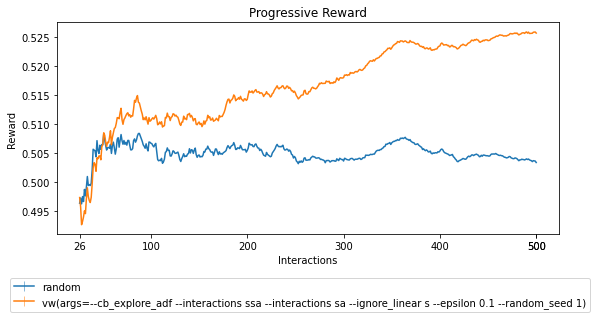

In [8]:
from coba.benchmarks import Result
Result.from_file('result.log').plot_learners()

# Result Filtering
We can also filter our results down to specific learners or simulations that we are interested in. There are three filter methods on Result: 
1. `result.filter_sim()`
2. `result.filter_lrn()`
3. `result.filter_fin()`

The first two functions either take a single predicate that returns true for or false for each row in the simulation table or keyword arguments whose values are regular expressions that each row's column value should match in order to keep it. For example if we wanted to just look at the vw learner on shuffle seed 1 we could do:

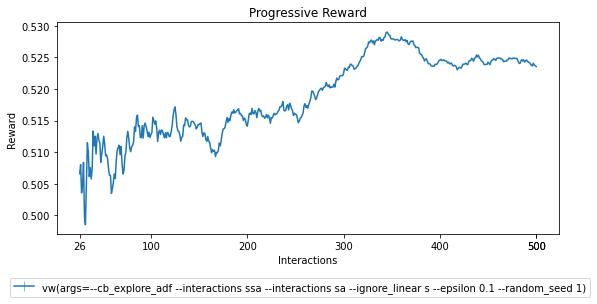

In [16]:
result.filter_sim(shuffle=1).filter_lrn(full_name="vw").plot_learners()

The third filter function is a little different and doesn't take any arguments. Instead it simply removes all simulations from result that hasn't had all learners evaluated. This is useful if you're looking at plots from an unfinished Benchmark and want to make sure learner comparisons are all using the same simulations.

## Result To Pandas

Finally, if the plotting functionality just shared isn't enough it is possible to extract all the data stored in Result into dataframes.

In [9]:
from coba.benchmarks import Result
Result.from_file('result.log').simulations.to_pandas()

,simulation_id,pipe,shuffle,source,take
0,0,"Validation,{""Shuffle"":1}",1,Validation,None
1,1,"Validation,{""Shuffle"":2}",2,Validation,None
2,2,"Validation,{""Shuffle"":3}",3,Validation,None


In [10]:
from coba.benchmarks import Result
Result.from_file('result.log').learners.to_pandas()

,learner_id,family,full_name,args
0,0,random,random,NaN
1,1,vw,vw(args=--cb_explore_adf --interactions ssa --...,--cb_explore_adf --interactions ssa --interact...


In [11]:
from coba.benchmarks import Result
Result.from_file('result.log').interactions.to_pandas()

,simulation_id,learner_id,index,reward
0,0,0,1,0.484863
1,0,0,2,0.523284
2,0,0,3,0.527425
3,0,0,4,0.532627
4,0,0,5,0.530323
...,...,...,...,...
2995,2,1,496,0.515833
2996,2,1,497,0.520707
2997,2,1,498,0.680577
2998,2,1,499,0.567128
